In [ ]:
%run Steady_state.py

Description of the building
notes:
Pour les surfaces des murs, les premiers calculs ont été fait en considérant que les longueures correspondent aux longueurs exterieurs.  

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modélisationV6 import *
from Data_Collection import *


Definition of thermo-physicals properties (we have kept the same value as the course) 

In [148]:
pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)

in  out
h  8.0   25

Computation of thermal conductance of conduction

In [149]:
pd.DataFrame.from_dict({'Conduction':G_cd})

Conduction
mur bas béton             672.000000
mur bas isolant            32.400000
mur haut béton            350.000000
mur haut isolant           16.875000
mur intérieur horizontal  210.000000
mur intérieur vertical    168.000000
porte                       6.382286
vitre                     140.000000

Computation of thermal conductance of convection

In [150]:
pd.DataFrame.from_dict({'Convection':G_conv})

Conduction
mur bas exterieur          2400.0000
mur bas intérieur           768.0000
mur haut exterieur          400.0000
mur haut interieur         1250.0000
mur intérieur horizontal    240.0000
mur intérieur vertical      192.0000
porte exterieur              37.2300
porte intérieur              11.9136
vitre exterieur             100.0000
vitre interieur              32.0000

Computation of thermal capacities

In [151]:
pd.DataFrame.from_dict({'Thermal capacity':C_thermal})

Thermal capacity
mur bas béton                   38860800.0
mur bas isolant                   511104.0
mur haut béton                  20240000.0
mur haut isolant                  266200.0
mur intérieur horizontal        12144000.0
mur intérieur vertical           9715200.0
vitre                             484000.0

Computation of thermal conductance of advection
Hypothesis: windows closed, front bottom door open, lateral doors open, middle top door (closed or open)

In [152]:
pd.DataFrame.from_dict({'Conduction':G_adv})

Conduction
Advection bas            75.0384
Advection entre haut     10.0000
Advection haut           76.1192

Steady State

In [ ]:
theta = np.linalg.inv(A.T @ np.diag(G) @ A) @ (A.T @ np.diag(G) @ b + f)
q = np.diag(G) @ (-A @ theta + b)
print('pièce 0 : ', theta[0], ', pièce 1 : ',theta[1],', pièce 2 : ', theta[2])

Weather data collection

Creation of a year's data by extracting randomly date from different months: 

In [153]:
pd.DataFrame(unique_month_years, columns=['Month-Year'])

Month-Year
0     01-2015
1     02-2011
2     03-2011
3     04-2015
4     05-2012
5     06-2012
6     07-2009
7     08-2015
8     09-2014
9     10-2011
10    11-2012
11    12-2012

After renaming this created year by 2020, we can choose the time bounds of our study in order to plot the outdoor temperature and solar radiation over this period: 

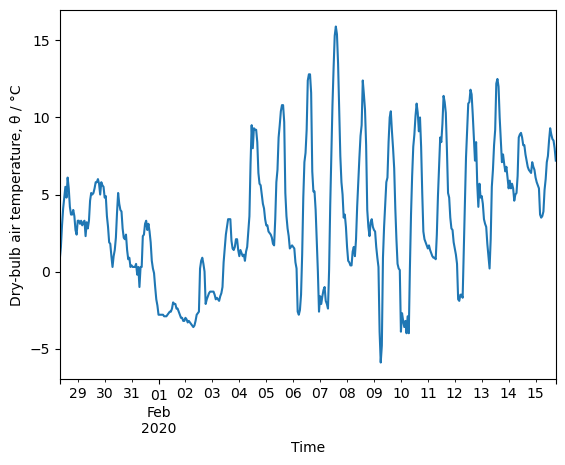

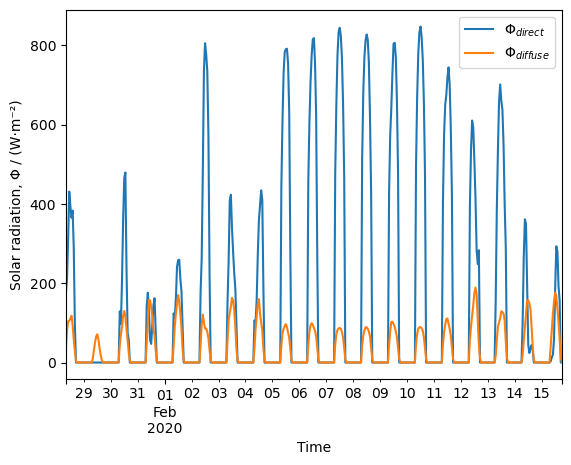

In [154]:
start_date = '2020-01-20 08:00'
end_date = '2020-02-15 18:00'
weather_data = weather_data.loc[start_date:end_date]
weather_data

weather_data['temp_air'].plot()
plt.xlabel("Time")
plt.ylabel("Dry-bulb air temperature, θ / °C")
plt.show()

weather_data[['dir_n_rad', 'dif_h_rad']].plot()
plt.xlabel("Time")
plt.ylabel("Solar radiation, Φ / (W·m⁻²)")
plt.legend(['$Φ_{direct}$', '$Φ_{diffuse}$'])
plt.show()